<a href="https://colab.research.google.com/github/hny00/LLM/blob/main/LLM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<aside>
🧑🏻‍🎓 *뉴스 기사를 수집하여 토큰화, 품사 태깅, 개체명 인식 등의 NLP기초 작업을 수행한 후, LLM을 사*
*용해 기사의 핵심 내용을 요약합니다.*

</aside>

Python의 NLTK 또는 SpaCy 라이브러리를 활용하여 텍스트 전처리 작업을 수행하고, OpenAI GPT 모델을 사용하여 자동 요약을 생성합니다.

## 자연어 처리 (NLP, Natural Language Processing) introduction

- 자연어 처리(NLP)는 컴퓨터가 인간 언어를 이해하고 생성할 수 있도록 하는 기술을 연구하는 분야로, 언어학, 컴퓨터 과학, 인공지능(AI) 기술의 교차점에 위치합니다. NLP는 다양한 언어적 과업을 수행하기 위해 다양한 알고리즘, 모델 및 기법을 사용합니다. 이러한 과업은 텍스트 데이터의 구조화, 분석, 생성 등을 포함합니다.

### 주요 기술적 과업 및 기법

1. **텍스트 전처리**
    - **토큰화(Tokenization)**: 문장을 단어, 문장 또는 어절 단위로 분리합니다. 예를 들어, "NLP is fascinating."이라는 문장은 ["NLP", "is", "fascinating", "."]으로 토큰화될 수 있습니다.

In [ ]:
import nltk
import numpy as np

# Ensure the punkt data is downloaded
nltk.download('punkt')

# Tokenization
text = "NLP is fascinating."
tokens = nltk.word_tokenize(text)
print("Tokens:", tokens)  # Output: ['NLP', 'is', 'fascinating', '.']

# One-hot encoding representation
vocab = sorted(set(tokens))
print("Vocabulary:", vocab)  # ['.', 'NLP', 'fascinating', 'is']

one_hot_vectors = np.eye(len(vocab))[np.array([vocab.index(token) for token in tokens])]

# Display the one-hot vectors for each token
for token, vector in zip(tokens, one_hot_vectors):
    print(f"Token: {token} -> Vector: {vector}")

정규화(Normalization): 텍스트를 일관된 형식으로 변환하는 작업입니다. 예를 들어, 모든 문자를 소문자로 변환하거나, 불필요한 기호를 제거할 수 있습니다.

In [ ]:
text = "NLP is fascinating!!!"
normalized_text = text.lower().replace("!!!", "")
print(normalized_text)  # Output: 'nlp is fascinating'

형태소 분석(Morphological Analysis): 단어의 어근, 접두사, 접미사를 분석하여 단어의 의미를 파악합니다. 예를 들어, "running"이라는 단어는 "run"이라는 어근과 "-ing" 접미사로 분해됩니다.

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
word = "running"
stem = stemmer.stem(word)
print(stem)  # Output: 'run'

품사 태깅(Part-of-Speech Tagging): 각 단어에 대해 문법적 품사를 지정하는 작업입니다. 예를 들어, "He is running."이라는 문장에서 "He"는 대명사(PRP), "is"는 동사(VBZ), "running"은 동명사(VBG)로 태깅됩니다.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download necessary resources
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')  # For word_tokenize to work

# Define the sentence
sentence = "He is running."

# Tokenize and tag parts of speech
pos_tags = nltk.pos_tag(word_tokenize(sentence))

# Print the result
print(pos_tags)  # Output: [('He', 'PRP'), ('is', 'VBZ'), ('running', 'VBG')]

2. **언어 모델링(Language Modeling)**
    - **n-그램 모델**: n-그램 모델은 단어 시퀀스의 확률을 계산하는 모델입니다. 예를 들어, 2-그램(bi-gram) 모델은 두 단어 쌍의 확률을 계산합니다. "I love NLP"에서 2-그램 모델은 P("love" | "I")와 P("NLP" | "love")의 확률을 계산하여 전체 문장의 확률을 평가합니다.
    - **신경망 언어 모델**:
        - **RNN (Recurrent Neural Networks)**: 시퀀스 데이터를 처리하는 신경망으로, 이전 상태를 고려하여 다음 단어를 예측합니다. 그러나 RNN은 긴 문맥을 처리하는 데 한계가 있습니다.
        - **LSTM (Long Short-Term Memory)**: RNN의 변형으로, 장기 의존성을 처리할 수 있도록 설계되었습니다. LSTM은 "셀 상태"를 유지하며, 이전 정보가 더 오래 유지될 수 있도록 합니다.
        - **Transformer**: 자기 주의 메커니즘(Self-Attention)을 사용하는 모델로, 병렬 처리가 가능하며, 긴 문맥을 효과적으로 처리할 수 있습니다. BERT(Bidirectional Encoder Representations from Transformers)와 GPT(Generative Pre-trained Transformer)는 Transformer 아키텍처에 기반한 대표적인 모델입니다.

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

input_text = "Natural language processing is"
input_ids = tokenizer.encode(input_text, return_tensors="pt")
output = model.generate(input_ids, max_length=50, num_return_sequences=1)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

3. **정보 검색(Information Retrieval) 및 추출(Extraction)**
    - **TF-IDF (Term Frequency-Inverse Document Frequency)**: 문서 내 특정 단어의 중요성을 평가하는 기법입니다. 단어의 빈도(Term Frequency)와 해당 단어가 등장한 문서 수의 역수(Inverse Document Frequency)를 곱하여 단어의 가중치를 계산합니다.
        - **TF-IDF**는 Python의 `sklearn` 라이브러리를 사용하여 TF-IDF를 계산합니다.
            - 개념
                - **TF (Term Frequency)**: 특정 단어가 문서 내에서 얼마나 자주 등장하는지를 나타내는 값.
                - **IDF (Inverse Document Frequency)**: 특정 단어가 전체 문서 집합에서 얼마나 흔하지 않은지를 나타내는 값.
            
            TF-IDF는 단어의 중요도를 평가하여, 문서에서 자주 등장하지만 모든 문서에 공통적으로 나타나는 단어들(예: "the", "and")의 중요도를 낮추고, 특정 문서에서만 빈번하게 등장하는 단어들의 중요도를 높입니다.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 예제 문서 집합
documents = [
    "자연어 처리는 인공지능의 한 분야입니다.",
    "자연어 처리와 컴퓨터 비전은 인공지능의 두 가지 중요한 분야입니다.",
    "컴퓨터 비전은 이미지와 비디오 데이터를 처리하는 기술입니다."
]

# TF-IDF 벡터라이저 초기화
vectorizer = TfidfVectorizer()

# 문서에 TF-IDF 적용
tfidf_matrix = vectorizer.fit_transform(documents)

# 단어 리스트 출력
print("Vocabulary:", vectorizer.get_feature_names_out())

# TF-IDF 행렬 출력
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())

# 특정 단어의 TF-IDF 값 출력 (예: '인공지능의')
word = '인공지능의'
word_index = vectorizer.vocabulary_.get(word)
if word_index is not None:
    print(f"\nTF-IDF value for '{word}':", tfidf_matrix[:, word_index].toarray())
else:
    print(f"'{word}' is not in the vocabulary.")

- **TF-IDF Matrix**: 각 단어가 각 문서에서 가지는 중요도를 나타냅니다. 값이 클수록 해당 문서에서 더 중요한 단어로 간주됩니다.
- 예를 들어, `인공지능`이라는 단어의 TF-IDF 값을 확인하면, 특정 문서에서 얼마나 중요한지 알 수 있습니다.

- **BM25**: TF-IDF의 확장 버전으로, 단어의 빈도와 문서 길이를 고려하여 검색의 정확도를 높이는 정보 검색 모델입니다. **BM25는** `rank-bm25` 라이브러리를 사용하여 BM25를 계산 합니다.
    
    개념
    
    - **BM25**: TF-IDF의 개선된 버전으로, 단어의 빈도, 문서 길이, 그리고 TF와 IDF 간의 균형을 고려하여 검색 성능을 최적화한 정보 검색 알고리즘입니다. BM25는 단순 TF-IDF보다 더 정교한 방법으로 문서와 질의 간의 유사도를 측정합니다.

In [ ]:
! pip install rank-bm25

from rank_bm25 import BM25Okapi
from nltk.tokenize import word_tokenize

# 예제 문서 집합
documents = [
    "자연어 처리는 인공지능의 한 분야입니다.",
    "자연어 처리와 컴퓨터 비전은 인공지능의 두 가지 중요한 분야입니다.",
    "컴퓨터 비전은 이미지와 비디오 데이터를 처리하는 기술입니다."
]

# 문서를 토큰화
tokenized_documents = [word_tokenize(doc) for doc in documents]

# BM25 모델 초기화
bm25 = BM25Okapi(tokenized_documents)

# 예제 질의
query = "인공지능 분야"

# 질의를 토큰화
tokenized_query = word_tokenize(query)

# 문서들의 BM25 점수 계산
scores = bm25.get_scores(tokenized_query)

# 각 문서에 대한 BM25 점수 출력
print("BM25 Scores:", scores)

# 가장 관련성 높은 문서 출력
best_doc_index = scores.argmax()
print("\\nMost relevant document:", documents[best_doc_index])

- **BM25 Scores**: 각 문서가 주어진 질의와 얼마나 관련성이 있는지를 나타냅니다. 값이 클수록 해당 문서가 질의와 더 관련이 있다고 판단됩니다.
- 예제에서는 "인공지능 분야"라는 질의를 기준으로 문서들의 관련성 점수를 계산하여, 가장 관련성이 높은 문서를 출력합니다.
- **Named Entity Recognition (NER)**: 텍스트에서 사람, 장소, 조직 등 명명된 실체를 추출하는 작업입니다.

In [ ]:
from transformers import pipeline

nlp = pipeline("ner")
text = "John works at OpenAI."
entities = nlp(text)
print(entities)  # Output: [{'word': 'John', 'score': 0.99, 'entity': 'PER'}, ...]

4. **자연어 생성(NLG, Natural Language Generation)**
    - **Seq2Seq 모델**: 입력 시퀀스에서 출력 시퀀스로 변환하는 모델로, 기계 번역에서 자주 사용됩니다. 입력 문장을 받아 번역된 문장을 생성하거나 요약을 생성할 수 있습니다.
    - **Transformer 기반 생성**: GPT 시리즈와 같은 모델은 문장을 생성하는 데 사용되며, 텍스트 완성, 스토리 생성 등 다양한 응용 분야에 사용됩니다.
5. **기계 번역(Machine Translation)**
    - **통계적 기계 번역(Statistical Machine Translation, SMT)**: 문장 단위로 번역 확률을 계산하는 기법입니다. 입력 언어와 출력 언어 간의 번역 패턴을 통계적으로 학습합니다.
    - **신경망 기계 번역(Neural Machine Translation, NMT)**: Seq2Seq 모델과 Attention 메커니즘을 사용하여 문장을 번역합니다. 현재는 Transformer 기반의 NMT가 널리 사용됩니다.

In [ ]:
from transformers import MarianMTModel, MarianTokenizer

model_name = "Helsinki-NLP/opus-mt-en-de"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = "Natural language processing is fascinating."
translated = model.generate(**tokenizer(input_text, return_tensors="pt", padding=True))
translation = tokenizer.decode(translated[0], skip_special_tokens=True)
print(translation)  # Output: 'Die Verarbeitung natürlicher Sprache ist faszinierend.'

6. **감정 분석(Sentiment Analysis)**
    - 텍스트에서 긍정, 부정, 중립 등의 감정적 반응을 분류하는 작업입니다. 감정 분석 모델은 주로 텍스트의 어휘와 문맥 정보를 활용하여 텍스트의 감정적 상태를 예측합니다.

In [ ]:
nlp = pipeline("sentiment-analysis")
text = "I love NLP!"
sentiment = nlp(text)
print(sentiment)  # Output: [{'label': 'POSITIVE', 'score': 0.999}]

In [ ]:
!pip install transformers

from transformers import pipeline

# 감정 분석 파이프라인 초기화
nlp = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# 한국어 예제 텍스트
text = "저는 자연어 처리가 정말 좋아요!"

# 감정 분석 수행
sentiment = nlp(text)

# 결과 확인 및 출력
if sentiment[0]['label'] == '5 stars':
    print("Positive")
elif sentiment[0]['label'] == '4 stars':
    print("Positive")
elif sentiment[0]['label'] == '3 stars':
    print("Neutral")
elif sentiment[0]['label'] == '2 stars':
    print("Negative")
elif sentiment[0]['label'] == '1 star':
    print("Negative")
else:
    print("Unknown sentiment")


# 결과 출력
# print(sentiment)  # Output: [{'label': '5 stars', 'score': 0.8432925343513489}]

7. **문서 요약(Document Summarization)**
    - **추출적 요약(Extractive Summarization)**: 원문에서 핵심 문장을 추출하여 요약을 생성하는 방법입니다.
    - **생성적 요약(Abstractive Summarization)**: 원문을 이해하고 새로운 문장을 생성하여 요약하는 방법입니다. 이는 더 복잡하지만, 보다 자연스러운 요약을 생성할 수 있습니다.

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration

model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

article = "Natural language processing (NLP) is a field of artificial intelligence..."
inputs = tokenizer.encode("summarize: " + article, return_tensors="pt", max_length=512, truncation=True)
summary_ids = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(summary)

### 대규모 언어 모델(LLM, Large Language Model)의 역할

- 대규모 언어 모델(LLM)은 수십억에서 수천억 개의 매개변수를 학습하여 자연어의 복잡한 패턴을 이해하고 생성하는 모델입니다. 이 모델은 대규모의 텍스트 데이터셋을 학습하여 인간 언어의 문법적 구조와 의미적 연관성을 포괄적으로 학습할 수 있습니다.

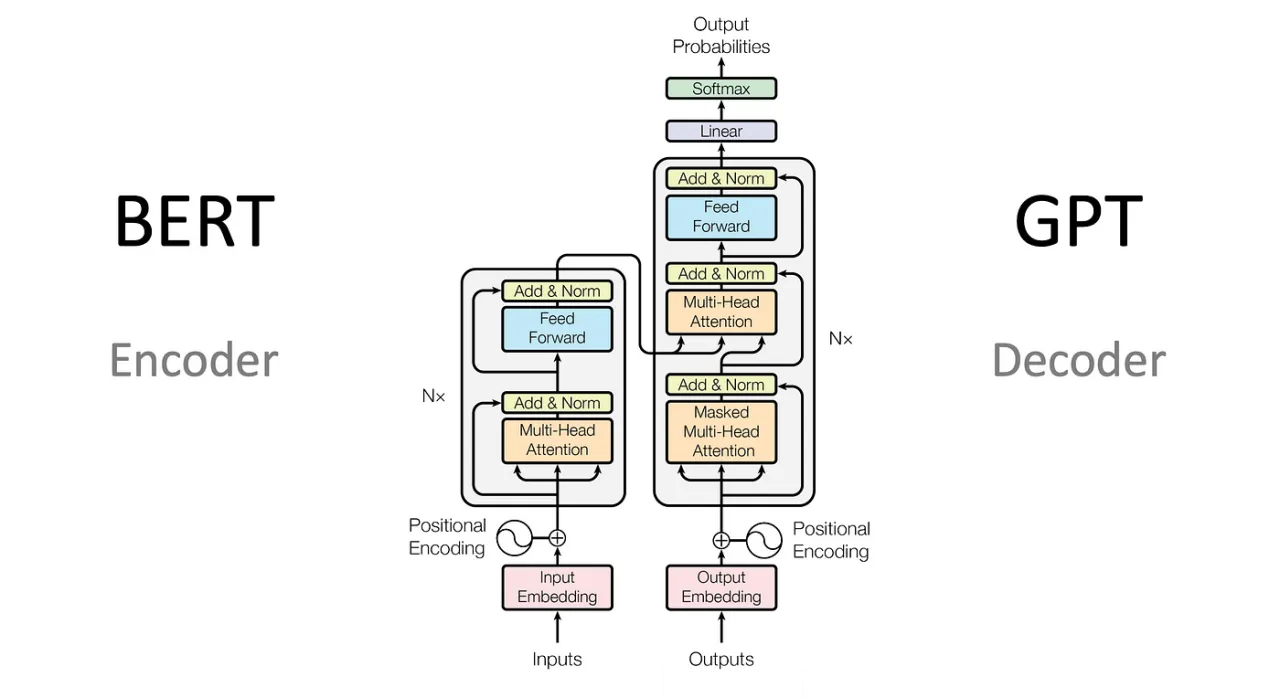

### 1. **Input Embedding / Output Embedding**

- **Input Embedding (BERT)**: 입력된 텍스트 데이터를 벡터로 변환하는 층입니다. 단어를 고유한 숫자 벡터로 변환하여 모델이 처리할 수 있는 형태로 만듭니다.
- **Output Embedding (GPT)**: 출력된 텍스트를 벡터로 변환하는 층입니다. BERT와 마찬가지로 텍스트를 고유한 숫자 벡터로 변환하지만, GPT에서는 디코딩 과정에서 사용됩니다.

### 2. **Positional Encoding**

- 위치 인코딩(Positional Encoding)은 단어의 순서를 나타내는 정보를 추가하는 것입니다. Transformer 모델은 순차적인 구조를 갖지 않기 때문에, 단어의 위치 정보를 명시적으로 인코딩하여 단어 순서를 학습할 수 있도록 도와줍니다.

### 3. **Multi-Head Attention**

- **Self-Attention (BERT)**: 인코더의 각 레이어에서 사용하는 메커니즘으로, 문장 내 모든 단어가 서로의 관계를 이해할 수 있도록 합니다. 여러 개의 헤드를 사용해 서로 다른 부분의 정보를 병렬로 처리하여 더 풍부한 표현을 얻을 수 있습니다.
- **Masked Multi-Head Attention (GPT)**: 디코더의 초기 단계에서 사용하는 메커니즘으로, 미래의 단어를 마스킹(masking)하여 현재의 단어만을 보고 다음 단어를 예측하게 합니다. 이로 인해 문장이 순차적으로 생성됩니다.

### 4. **Add & Norm**

- 각 레이어에서 나오는 출력에 원래의 입력을 더한 후 정규화(Normalization)를 수행하는 과정입니다. 이는 모델이 더 안정적으로 학습되도록 도와줍니다. 잔차 연결(Residual Connection)을 통해 정보가 손실되지 않고 유지될 수 있습니다.

### 5. **Feed Forward**

- 각 Attention 메커니즘 이후에 사용되는 간단한 완전 연결 신경망(Feed-Forward Neural Network, FFNN)입니다. 각 단어에 대해 독립적으로 적용되며, 비선형 변환을 통해 모델의 표현력을 높입니다.

### 6. **Linear & Softmax (GPT)**

- **Linear**: 디코더의 마지막 층에서 사용하는 선형 변환입니다. 디코더에서 생성된 벡터를 단어 예측 확률 분포로 변환하는 역할을 합니다.
- **Softmax**: 선형 변환의 결과를 바탕으로 확률 분포를 생성합니다. 각 단어에 대해 확률 값을 계산하며, 가장 높은 확률을 가진 단어가 다음 단어로 선택됩니다.

### 모델의 전반적인 설명

- **BERT (Bidirectional Encoder Representations from Transformers)**: BERT는 Transformer의 인코더(Encoder) 부분만을 사용하여 문장의 양방향 정보를 학습하는 모델입니다. 이는 자연어 이해(NLU) 작업에 매우 유용합니다.
- **GPT (Generative Pre-trained Transformer)**: GPT는 Transformer의 디코더(Decoder) 부분만을 사용하여 문장을 순차적으로 생성하는 모델입니다. 이는 자연어 생성(NLG) 작업에 강점을 가지고 있습니다.

이 구조는 BERT가 문장의 전체 문맥을 이해하는 데 중점을 두고 있으며, GPT는 주어진 단어 시퀀스에서 다음 단어를 예측하여 텍스트를 생성하는 데 중점을 두고 있다는 점에서 차이가 있습니다.

<aside>
🧑🏻‍🎓

### 1. OpenAI 계정 생성 또는 로그인

1. **OpenAI 웹사이트 방문**: [OpenAI의 웹사이트](https://platform.openai.com/)에 접속합니다.
2. **계정 생성**:
    - OpenAI 계정이 없다면, "Sign Up" 버튼을 클릭하여 계정을 생성합니다.
    - 이메일 주소, Google 계정, 또는 Microsoft 계정 중 하나를 선택하여 가입할 수 있습니다.
3. **로그인**:
    - 이미 계정이 있다면, "Log In" 버튼을 클릭하여 로그인합니다.

### 2. API 접근을 위한 계정 설정

1. **대시보드 접속**:
    - 로그인 후, OpenAI의 대시보드로 이동합니다. 대시보드에서는 API 사용에 관한 다양한 설정과 정보에 접근할 수 있습니다.
2. **API Key 발급**:
    - **프로필 메뉴**: 대시보드 오른쪽 상단의 프로필 아이콘을 클릭합니다.
    - **API 키 관리**: 드롭다운 메뉴에서 "View API Keys" 또는 "API Keys" 옵션을 선택합니다. 이 페이지에서는 기존 API 키를 관리하거나 새로운 키를 생성할 수 있습니다.
    - **새 API 키 생성**: "Create new secret key" 버튼을 클릭하여 새로운 API 키를 생성합니다.
    - 생성된 API 키가 화면에 나타나며, 이 키를 안전하게 저장해야 합니다. (다시 조회할 수 없으므로 반드시 복사해 두세요.)

### 3. 결제 정보 등록 및 사용량 제한 설정 (선택 사항)

1. **결제 정보 등록**:
    - 무료 사용 한도를 넘어서 더 많은 API 요청을 사용하려면, 결제 정보를 등록해야 합니다.
    - 대시보드에서 "Billing" 섹션으로 이동한 후 결제 정보를 입력할 수 있습니다.
2. **사용량 제한 설정**:
    - API 사용량을 관리하기 위해 사용량 제한을 설정할 수 있습니다.
    - "Usage" 또는 "Usage Limits" 섹션에서 일일, 월별 예산을 설정하여 예상치 못한 과금이 발생하지 않도록 할 수 있습니다.

### 4. API 키 사용

1. **API 키 사용**:
    - 발급받은 API 키를 사용하여 OpenAI의 다양한 API를 호출할 수 있습니다.
    - API 요청 시, HTTP 헤더에 `Authorization` 헤더를 추가하여 API 키를 전달합니다. 예를 들어:
        
        ```python
        !pip install openai==0.27.0
        import openai
        import os
        
        # 예제 한국어 뉴스 기사 텍스트
        news_article = """
        오늘 주식 시장은 주요 기술 기업들이 분기별 실적 보고서를 발표하면서 큰 변동을 보였다.
        애플은 아이폰 판매와 서비스 부문의 성장에 힘입어 예상보다 높은 수익 증가를 보고했다.
        반면 구글의 모회사인 알파벳은 광고 수익이 감소하여 주가가 하락했다.
        투자자들은 이러한 상황이 기술 분야의 광범위한 추세를 나타낼 수 있다는 점에서 주목하고 있다.
        전체 시장은 혼조세를 보였으며, 일부 지수는 상승한 반면 다른 지수는 하락하며 거래를 마감했다.
        """
        
        # OpenAI API 키 설정
        openai.api_key = ""
        
        def summarize_article(article):
            response = openai.ChatCompletion.create(
                model="gpt-3.5-turbo",
                messages=[
                    {"role": "system", "content": "You are a helpful assistant."},
                    {"role": "user", "content": f"다음 뉴스 기사를 요약해 주세요:\\n\\n{article}"}
                ],
                max_tokens=150,
                temperature=0.5
            )
            summary = response.choices[0].message['content'].strip()
            return summary
        
        # 요약 생성
        summary = summarize_article(news_article)
        print("Summary:", summary)
        ```
        
2. **보안 주의**:
    - API 키는 중요한 보안 정보입니다. 키가 노출되지 않도록 주의하고, 필요한 경우 언제든지 API 키를 대시보드에서 폐기하고 새로 발급할 수 있습니다.

### 5. API 사용 모니터링

1. **API 사용량 확인**:
    - "Usage" 탭에서 API 사용량을 실시간으로 모니터링할 수 있습니다. 사용량 그래프와 상세 통계가 제공되며, 이를 통해 얼마나 많은 API 호출을 했는지 확인할 수 있습니다.
2. **예산 초과 알림 설정**:
    - 결제 설정에서 사용량이 특정 한도를 초과하면 알림을 받도록 설정할 수 있습니다.
</aside>

### LLM의 기술적 역할과 기능

1. **사전 훈련과 파인튜닝**
    - **사전 훈련(Pre-training)**: 대규모 텍스트 데이터셋을 사용해 비지도 학습으로 언어의 일반적 패턴을 학습합니다. 예를 들어, GPT 모델은 다음 단어를 예측하는 작업을 통해 사전 훈련됩니다.
    - **파인튜닝(Fine-tuning)**: 사전 훈련된 모델을 특정 도메인이나 작업에 맞게 추가적으로 훈련합니다. 예를 들어, 법률 텍스트에 맞춘 파인튜닝을 통해 법률 문서 요약 모델을 생성할 수 있습니다.
2. **텍스트 생성**
    - **자동 완성**: 사용자가 시작한 문장을 자동으로 완성하거나 이어지는 텍스트를 생성합니다. 예를 들어, GPT-3 모델은 "The future of AI is"라는 문장을 입력하면, 미래에 대한 다양한 예측을 이어서 생성할 수 있습니다.
    - **창의적 글쓰기**: 시나리오 작성, 스토리텔링 등의 창의적 작업에 LLM이 사용될 수 있습니다.
3. **질문 답변**
    - LLM은 문맥을 이해하고 입력된 질문에 대해 적절한 답변을 생성합니다. 예를 들어, "What are the benefits of natural language processing?"이라는 질문에 대한 구체적인 응답을 생성할 수 있습니다.
4. **텍스트 요약 및 번역**
    - LLM은 입력 텍스트의 요약본을 생성하거나, 다른 언어로의 번역을 수행합니다. 이는 다국어 모델의 경우 더 효과적으로 작동할 수 있습니다.

예제: GPT-3를 사용한 질문 답변

In [ ]:
import openai

openai.api_key = "your-openai-api-key"

def ask_gpt3(question):
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=question,
        max_tokens=150
    )
    return response.choices[0].text.strip()

question = "What are the benefits of natural language processing?"
answer = ask_gpt3(question)
print(answer)

### LLM의 한계와 도전 과제

1. **편향성(Bias)**:
    - LLM은 학습된 데이터셋에 내재된 사회적, 문화적 편향성을 반영할 수 있습니다. 이는 특정 그룹에 대한 편향된 출력을 생성할 가능성을 증가시킵니다.
2. **사실적 정확성(Factual Accuracy)**:
    - LLM은 가끔 잘못된 정보를 생성할 수 있습니다. 모델은 언어 패턴을 학습하지만, 실제 사실과 다른 문장을 생성할 수 있는 위험이 있습니다.
3. **계산 자원 요구**:
    - LLM의 훈련 및 추론에는 막대한 계산 자원이 필요합니다. 이는 환경적 비용을 초래하며, 이러한 모델을 배포하는 데 상당한 인프라가 요구됩니다.
4. **모델 해석 가능성(Interpretability)**:
    - LLM은 내부 작동 원리를 이해하기 어려운 블랙박스 모델입니다. 이는 모델이 왜 특정 출력을 생성하는지 설명하는 데 어려움을 초래합니다.

### 예제 1

> 뉴스 기사를 수집하여 토큰화, 품사 태깅, 개체명 인식 등의 NLP기초 작업을 수행한 후, LLM을 사용해 기사의 핵심 내용을 요약, Python의 NLTK 또는 SpaCy 라이브러리를 활용하여 텍스트 전처리 작업을 수행하고, OpenAI GPT 모델을 사용하여 자동 요약을 생성.
>

1. 필요한 라이브러리 설치

In [ ]:
pip install nltk spacy openai
python -m spacy download ko_core_news_sm

### 2. 한국어 뉴스 기사 수집

여기서는 예제로 한국어 뉴스 기사를 텍스트로 입력합니다. 실제 애플리케이션에서는 웹 스크래핑 또는 API를 사용하여 기사를 수집할 수 있습니다.

In [ ]:
# 예제 한국어 뉴스 기사 텍스트
news_article = """
오늘 주식 시장은 주요 기술 기업들이 분기별 실적 보고서를 발표하면서 큰 변동을 보였다.
애플은 아이폰 판매와 서비스 부문의 성장에 힘입어 예상보다 높은 수익 증가를 보고했다.
반면 구글의 모회사인 알파벳은 광고 수익이 감소하여 주가가 하락했다.
투자자들은 이러한 상황이 기술 분야의 광범위한 추세를 나타낼 수 있다는 점에서 주목하고 있다.
전체 시장은 혼조세를 보였으며, 일부 지수는 상승한 반면 다른 지수는 하락하며 거래를 마감했다.
"""

### 3. 텍스트 전처리 작업 수행

### 3.1. NLTK를 사용한 토큰화 및 품사 태깅

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag

# NLTK 다운로드 (최초 실행 시)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# 문장 토큰화
sentences = sent_tokenize(news_article)
print("Sentences:", sentences)

# 단어 토큰화 및 품사 태깅 (한국어는 spaCy로 더 효과적이지만, 여기서는 NLTK로 예시를 보여줍니다.)
words = word_tokenize(news_article)
pos_tags = pos_tag(words)
print("POS Tags:", pos_tags)

3.2. SpaCy를 사용한 개체명 인식(NER)

In [ ]:
import spacy

# SpaCy 한국어 모델 로드
nlp = spacy.load("ko_core_news_sm")

# 텍스트 분석
doc = nlp(news_article)

# 개체명 인식
for ent in doc.ents:
    print(ent.text, ent.label_)

### 4. OpenAI GPT-3.5 Turbo 모델을 사용한 요약 생성

### 4.1. OpenAI API Key 설정

In [ ]:
!pip install openai==0.27.0
import openai
import os

# OpenAI API 키 설정
openai.api_key = "your-openai-api-key-here"

4.2. 요약 생성

In [ ]:
def summarize_article(article):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": f"다음 뉴스 기사를 요약해 주세요:\\n\\n{article}"}
        ],
        max_tokens=150,
        temperature=0.5
    )
    summary = response.choices[0].message['content'].strip()
    return summary

# 요약 생성
summary = summarize_article(news_article)
print("Summary:", summary)

5. 전체 코드 정리

In [ ]:
# Colab 환경에서 필요한 패키지 설치
# Colab에서 사용할 때는 런타임이 끊기면 설치된 내용이 지워지기 때문에 런타임을 새로시작할 때는 openai 모듈을 새로 설치해야 오류가 없습니다.
!pip install openai==0.27.0
!pip install spacy
!pip install https://github.com/explosion/spacy-models/releases/download/ko_core_news_sm-3.5.0/ko_core_news_sm-3.5.0-py3-none-any.whl

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
import spacy
import openai

# NLTK 다운로드 (최초 실행 시)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# SpaCy 한국어 모델 로드
nlp = spacy.load("ko_core_news_sm")

# OpenAI API 키 설정
openai.api_key = ""

# 예제 한국어 뉴스 기사 텍스트
news_article = """
오늘 주식 시장은 주요 기술 기업들이 분기별 실적 보고서를 발표하면서 큰 변동을 보였다.
애플은 아이폰 판매와 서비스 부문의 성장에 힘입어 예상보다 높은 수익 증가를 보고했다.
반면 구글의 모회사인 알파벳은 광고 수익이 감소하여 주가가 하락했다.
투자자들은 이러한 상황이 기술 분야의 광범위한 추세를 나타낼 수 있다는 점에서 주목하고 있다.
전체 시장은 혼조세를 보였으며, 일부 지수는 상승한 반면 다른 지수는 하락하며 거래를 마감했다.
"""

# 1. 문장 토큰화
sentences = sent_tokenize(news_article)
print("Sentences:", sentences)

# 2. 단어 토큰화 및 품사 태깅 (영어 기반으로 설명을 보여주기 위해 예시를 유지)
words = word_tokenize(news_article)
pos_tags = pos_tag(words)
print("POS Tags:", pos_tags)

# 3. 개체명 인식(NER)
doc = nlp(news_article)
print("\nNamed Entities:")
for ent in doc.ents:
    print(ent.text, ent.label_)

# 4. 요약 생성
def summarize_article(article):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": f"다음 뉴스 기사를 요약해 주세요:\\n\\n{article}"}
        ],
        max_tokens=150,
        temperature=0.5
    )
    summary = response.choices[0].message['content'].strip()
    return summary

summary = summarize_article(news_article)
print("\nSummary:", summary)

### 연습문제 1: 문장 토큰화와 단어 토큰화

- **문제:** 주어진 한국어 뉴스 기사에서 문장 토큰화와 단어 토큰화를 각각 수행하고, 토큰화된 문장과 단어 리스트를 출력하세요. 또한, 각각의 문장에서 몇 개의 단어가 있는지 출력하세요.

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

# 예제 한국어 뉴스 기사 텍스트
news_article = """
오늘 주식 시장은 주요 기술 기업들이 분기별 실적 보고서를 발표하면서 큰 변동을 보였다.
애플은 아이폰 판매와 서비스 부문의 성장에 힘입어 예상보다 높은 수익 증가를 보고했다.
반면 구글의 모회사인 알파벳은 광고 수익이 감소하여 주가가 하락했다.
투자자들은 이러한 상황이 기술 분야의 광범위한 추세를 나타낼 수 있다는 점에서 주목하고 있다.
전체 시장은 혼조세를 보였으며, 일부 지수는 상승한 반면 다른 지수는 하락하며 거래를 마감했다.
"""

# 문장 토큰화
sentences = sent_tokenize(news_article)
print("Sentences:", sentences)

# 단어 토큰화 및 각 문장의 단어 개수 출력
for i, sentence in enumerate(sentences):
    words = word_tokenize(sentence)
    print(f"Sentence {i+1}: {words}")
    print(f"Number of words in Sentence {i+1}: {len(words)}")

### 연습문제 2: 품사 태깅

- **문제:** NLTK를 사용하여 뉴스 기사 텍스트의 각 단어에 대해 품사 태깅을 수행하세요. 그 결과를 출력하고, 주어(명사)와 동사만 출력해 보세요.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')

# 단어 토큰화
words = word_tokenize(news_article)

# 품사 태깅
pos_tags = pos_tag(words)
print("POS Tags:", pos_tags)

# 주어(명사)와 동사만 출력
nouns_and_verbs = [word for word, pos in pos_tags if pos.startswith('N') or pos.startswith('V')]
print("Nouns and Verbs:", nouns_and_verbs)

### 연습문제 3: 개체명 인식(NER)

- **문제:** SpaCy를 사용하여 주어진 뉴스 기사에서 개체명 인식(NER)을 수행하세요. 기사에서 언급된 모든 개체명과 그 유형을 출력하세요.

In [ ]:
import spacy

# SpaCy 한국어 모델 로드
nlp = spacy.load("ko_core_news_sm")

# 텍스트 분석
doc = nlp(news_article)

# 개체명 인식
for ent in doc.ents:
    print(ent.text, ent.label_)

### 연습문제 4: 요약 생성

- **문제:** GPT-3.5 Turbo 모델을 사용하여 주어진 한국어 뉴스 기사의 요약을 생성하세요. 요약된 내용을 출력하세요.

In [ ]:
import openai

# OpenAI API 키 설정
openai.api_key = "your-openai-api-key-here"

# 요약 생성 함수
def summarize_article(article):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": f"다음 뉴스 기사를 요약해 주세요:\\n\\n{article}"}
        ],
        max_tokens=150,
        temperature=0.5
    )
    summary = response.choices[0].message['content'].strip()
    return summary

summary = summarize_article(news_article)
print("Summary:", summary)

### 연습문제 5: 사용자 입력에 따른 뉴스 요약

- **문제:** 사용자가 임의의 한국어 뉴스 기사를 입력할 수 있게 하고, 입력된 기사를 토큰화, 품사 태깅 및 요약하는 프로그램을 작성하세요. 사용자가 직접 입력한 뉴스 기사를 요약된 형태로 출력하세요.

In [ ]:
import nltk
import spacy
import openai

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

nlp = spacy.load("ko_core_news_sm")
openai.api_key = "your-openai-api-key-here"

# 사용자 입력 뉴스 기사
news_article = input("요약할 한국어 뉴스 기사를 입력하세요:\\n")

# 문장 토큰화
sentences = nltk.sent_tokenize(news_article)
print("Sentences:", sentences)

# 단어 토큰화 및 품사 태깅
for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    pos_tags = nltk.pos_tag(words)
    print("POS Tags:", pos_tags)

# 개체명 인식(NER)
doc = nlp(news_article)
for ent in doc.ents:
    print(ent.text, ent.label_)

# 요약 생성
summary = summarize_article(news_article)
print("Summary:", summary)